# DBSCAN  (Density- Based Spatial Clustering of Application with Noise)

클러스터링 알고리즘은 크게 중심 기반 (center-based) 알고리즘과 밀도 기반 (density-based) 알고리즘으로 나눌 수 있다. 

중심 기반 클러스터링 : k-means   
밀도 기반 클러스터링 : DBSCAN 

중심 기반 클러스터링 알고리즘은 "동일한 클래스에 속하는 데이터는 어떠한 중심을 기준으로 분포할 것이다"라는 가정을 기반으로 한다. 이와 다르게 밀도 기반 알고리즘은 "동일한 클래스에 속하는 데이터는 서로 근접하게 분포할 것이다"라는 가정을 기반으로 동작한다. 


클러스터링 비교 이미지  
<img src= "https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile22.uf.tistory.com%2Fimage%2F99D207335B96763F180C1C" > 


중신 기반 클러스터링은 먼저 중심 데이터를 선정하고 이를 기반으로 이웃한 데이터를 클러스터링 하는 반면, 밀도 기반 클러스터링은 어떤 데이터의 주변에 이웃한 데이터들이 있을 경우, 그 데이터를 핵심 데이터로 선정하며 클러스터링을 진행해갑니다. 


장점 
- 클러스터링 개수를 지정해 줄 필요없이 자동으로 찾는다. 
- 원모양의 클러스터 뿐만아니라 불특정한 모양의 클러스터도 찾을 수 있다. 
- 클러스터링을 수행하며 noise 데이터도 걸러내기 때문에 이상치에 대해 둔감하다.

단점
- 데이터 입력순서에 클러스터가 영향을 받는다. 
- 알고리즘이 사용하는 거리 측정방법에 클러스터가 영향을 받는다.
- 데이터의 특성을 모를 경우, 알고리즘의 적절한 hyper parameter를 설정해주기 어렵다. 


## DBSCAN 작동원리  

DBSCAN은 각각의 데이터들에 대해 이웃한 데이터와의 밀도를 계산하면서 불특정한 모양의 클러스터를 생성한다. 따라서, DBSCAN을 정의하기 위해서는 이웃한 데이터와 클러스터에 대한 정의가 필요하다. 이를 위해 DBSCAN의 hyper-parameter로 주어지는 주변 거리 ϵ과 최소 이웃 데이터의 수 nc를 기반으로 아래와 같은 개념들을 정의한다.

- 이웃 데이터 (border data) : 어떤 데이터 x와의 주변 거리 ϵ내에 있지만 자기 자신을 중심으로 주변 거리 ϵ내에는 이웃 데이터의 수 nc를 만족하진 못하는 데이터
- 핵심 데이터 (core data) : 이웃 데이터의 수 nc를 만족하는 데이터 
- 노이즈 데이터 (noise data) : 핵심도 아니고 이웃도 아닌 데이터



DBSCAN 데이터분류 예시  
<img src= "https://www.researchgate.net/profile/Yijin_Liu/publication/308750501/figure/fig4/AS:412083041652736@1475259661770/Schematic-drawings-of-the-DBSCAN-clustering-algorithm-Panel-a-shows-the-clustering.png">

- 그림 b의 P는 주변 eps내에 MinPts 를 넘는 이웃데이터를 가지고 있으므로 core data로 분류됩니다.
- 그림 c의 P' 는 핵심데이터의 eps내에 존재하지만 자기자신을 기준으론 eps내에 MinPts를 넘지 못하므로 border data로 분류됩니다.
- 그림 f의 데이터는 eps내에 MinPts를 넘는 이웃데이터를 가지고 있지도 않고 핵심 데이터의 eps 내에 포함되지도 못하기 때문에 noise data로 분류됩니다.

## dbscan 모델 구현

랜덤 데이터 생성

In [0]:
import numpy as np

rdata = np.random.randn(10,2)

In [24]:
rdata

array([[ 0.99693075, -0.9090959 ],
       [-0.36485279,  0.58455318],
       [-0.79241895,  1.4513677 ],
       [-1.23154446,  2.00724778],
       [-0.89915197,  2.26471044],
       [ 0.87295435,  0.03354676],
       [ 0.04030602,  1.19448548],
       [-0.54311997,  1.32327579],
       [-1.83072375,  0.17645713],
       [-0.41283396, -0.95250149]])

In [25]:
rdata[:,0]

array([ 0.99693075, -0.36485279, -0.79241895, -1.23154446, -0.89915197,
        0.87295435,  0.04030602, -0.54311997, -1.83072375, -0.41283396])

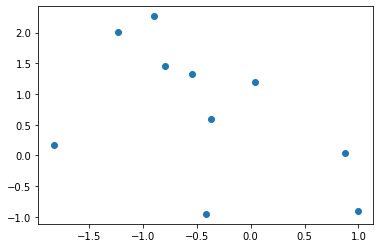

In [26]:
import matplotlib.pyplot as plt


# a= plt.axes(xlim=(-2,2),ylim=(-2,2))
plt.scatter(rdata[:,0],rdata[:,1])


데이터간 거리 측정
- 유클리드 거리
- eps = 0.8

In [0]:
import numpy as np
eps = 0.8
eud_lists = []
eud_index =[]
for i in range(len(rdata)):
    lists = []
    idxs = []
    for j in range(len(rdata)):
        eu_d = np.sqrt((rdata[i,0] - rdata[j,0])**2 + (rdata[i,1]-rdata[j,1])**2)
        if (eu_d != 0) and (eu_d <= eps):
            idxs.append(j)
            lists.append(eu_d)
    eud_lists.append(lists)
    eud_index.append(idxs)


    

In [28]:
eud_lists

[[],
 [0.7322370301521087, 0.759927813843305],
 [0.7084023494528385, 0.28028113788460185],
 [0.7084023494528385, 0.4204423738044254],
 [0.4204423738044254],
 [],
 [0.7322370301521087, 0.5974720305136714],
 [0.759927813843305, 0.28028113788460185, 0.5974720305136714],
 [],
 []]

In [29]:
eud_index

[[], [6, 7], [3, 7], [2, 4], [3], [], [1, 7], [1, 2, 6], [], []]

- 최소 이웃 데이터 =2 로 하여 인근 2개 이상의 데이터를 가지고 있으면 core 데이터로 한다.

In [0]:
core_index = []
border_index= []
noise_index = []
for idx,i in enumerate(eud_lists):
    if len(i) >=2:
        core_index.append(rdata[idx])
    elif len(i) != 0:
        border_index.append(rdata[idx])
    else:
        noise_index.append(rdata[idx])

In [31]:
core_index,border_index,noise_index

([array([-0.36485279,  0.58455318]),
  array([-0.79241895,  1.4513677 ]),
  array([-1.23154446,  2.00724778]),
  array([0.04030602, 1.19448548]),
  array([-0.54311997,  1.32327579])],
 [array([-0.89915197,  2.26471044])],
 [array([ 0.99693075, -0.9090959 ]),
  array([0.87295435, 0.03354676]),
  array([-1.83072375,  0.17645713]),
  array([-0.41283396, -0.95250149])])

In [0]:
core_index = np.array(core_index)
border_index = np.array(border_index)
noise_index = np.array(noise_index)

핵심, 이웃, 노이즈 데이터 위치

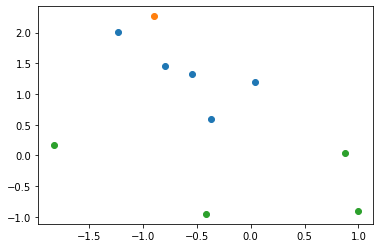

In [33]:
plt.scatter(core_index[:,0],core_index[:,1])
plt.scatter(border_index[:,0],border_index[:,1])
plt.scatter(noise_index[:,0],noise_index[:,1])

코어 포인트들끼리 서로 이웃하면 서로 하나의 군집으로 묶인다고 합니다.

sklearn DBSCAN 패키지를 활용한 구현

In [34]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8,min_samples=3)

dbscan.fit(rdata)

DBSCAN(algorithm='auto', eps=0.8, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=3, n_jobs=None, p=None)

In [0]:
y = dbscan.fit_predict(rdata)

y predict값이 예측한 클러스터링 값은 0부터 시작해서 클러스터 개수까지 +1로 올라갑니다. (ex) 군집개수가 2개면 0,1 )   
-1값은 노이즈 데이터를 의미합니다.

In [36]:
y

array([-1,  0,  0,  0,  0, -1,  0,  0, -1, -1])

군집을 하나만 형성했고 노이즈 데이터가 4개 있습니다.  
위에서 보았던 핵심데이터와 이웃데이터의 위치에 있던 데이터들이 하나의 군집을 형성했습니다.  

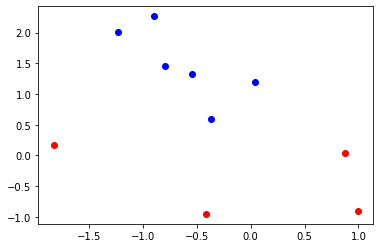

In [41]:
plt.scatter(rdata[y==0,0],rdata[y==0,1],c='blue')
plt.scatter(rdata[y==-1,0],rdata[y==-1,1],c='red')

Reference  
https://untitledtblog.tistory.com/146